# Kapitel 08 - 01

> ### <span style="color:red">ACHTUNG:</span> Bitte zum Starten im Menü `Cell->Run All` ausführen.

## Deaktivieren der Warnungen

In [0]:
import warnings
warnings.filterwarnings('ignore')

## MNIST

#### Listing 8.1

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical




In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape Trainingsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))
print("Label zu Bild Nr. 5 {}".format(train_labels[5]))

11493376/11490434 [==============================] - 0s 0us/step
Shape Trainingsdaten: (60000, 28, 28)
Dimension Bild Nr. 5: (28, 28)
Label zu Bild Nr. 5 2


#### Listing 8.2

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')
test_images /= 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]



#### Listing 8.3

In [0]:
print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))

print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))


Trainingsdatensatz:(60000, 28, 28, 1)
Testdatensatz:(10000, 28, 28, 1)
Wir haben 60000 Trainingsbilder und 10000 Testbilder.


#### Listing 8.4

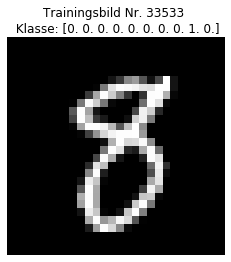

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,60000)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex,train_labels[randindex])
plt.imshow(train_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()


#### Listing 8.5

In [0]:
import os
import numpy as np

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


#### Listing 8.6

In [0]:
# Das Format der Eingabedaten wird an das erste Layer übergeben
inputshape = train_images.shape[1:4]


# Die Netzwerkarchitektur
model = Sequential()
# Kodierungsblock
model.add(Conv2D(32, kernel_size=(5,5), 
      activation = 'relu',
      input_shape=inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Conv_Block 2
model.add(Conv2D(64, kernel_size=(5,5),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Prädiktionssblock
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________

#### Listing 8.7

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])


#### Listing 8.8

In [0]:
# TensorBoard - Vorbereitung
LOGDIR = "logs" # hier das eigene Verzeichnis angeben
my_tensorboard = TensorBoard(log_dir = LOGDIR,
      histogram_freq=0,
      write_graph=True,
      write_images=True)
# Hyperparameter
my_batch_size = 128
my_num_classes = 10
my_epochs = 5

history = model.fit(train_images, train_labels,
      batch_size=my_batch_size,
      callbacks=[my_tensorboard],
      epochs=my_epochs,
      use_multiprocessing=False,
      verbose=1,
      validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3791 - acc: 0.8773 - val_loss: 0.0591 - val_acc: 0.9811
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1097 - acc: 0.9665 - val_loss: 0.0384 - val_acc: 0.9881
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0828 - acc: 0.9744 - val_loss: 0.0333 - val_acc: 0.9896
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0691 - acc: 0.9799 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0597 - acc: 0.9824 - val_loss: 0.0294 - val_acc: 0.9903


#### Listing 8.9

In [0]:
score = model.evaluate(test_images, test_labels)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])


10000/10000 [==============================] - 1s 70us/sample - loss: 0.0294 - acc: 0.9903
Test Verlust: 0.029423236111302684
Test Genauigkeit: 0.9903


#### Listing 8.10

In [0]:
from tensorflow.keras import models

# Speichern des Modells im Keras-HDF5 Format
model.save('SimpleCNN_MNIST.h5')

#### Listing 8.11

In [0]:
modellverzeichnis = 'models'

# Speichern des Modells im TensorFlow-SavedModel Format
model.save(modellverzeichnis, save_format = 'tf')

INFO:tensorflow:Assets written to: models/assets


#### Listing 8.12

In [0]:
from tensorflow.keras.models import load_model
modellverzeichniss = 'models'

# Laden des HDF5-Modells (h5)
# h5 ist die typische Dateierweiterung für dieses Format
new_model_h5 = load_model('SimpleCNN_MNIST.h5')

# Laden des SavedModel-Modells (pb)
# pb ist die typische Dateierweiterung für dieses Format
# allerdings werden auch die Verzeichnisse assets und variables angelegt
new_model_pb = load_model(modellverzeichnis)

prediction_h5 = new_model_h5.predict(test_images)
prediction_pb = new_model_pb.predict(test_images)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### Listing 8.13

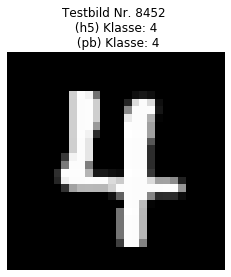

In [0]:
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,10000)
# Die Funktion argmax() liefert uns den index des höchsten Werts des Ergebnisvektors
h5_class = prediction_h5[randindex].argmax()
pb_class = prediction_pb[randindex].argmax()
plttitle = "Testbild Nr. {} \n (h5) Klasse: {} \n (pb) Klasse: {}".format(randindex,h5_class, pb_class)
plt.imshow(test_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()